<a href="https://colab.research.google.com/github/chvrreddy/Tutedude_Data_Science/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


Basics of Probability

a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  
b. Rolling two dice and computing the probability of getting a sum of 7.  
  Steps



In [5]:
# Part 1(a): Coin toss simulation

n_tosses = 100000
coin_outcomes = [random.choice(['H','T']) for _ in range(n_tosses)]
heads = coin_outcomes.count('H')
tails = n_tosses - heads
p_heads = heads / n_tosses
p_tails = tails / n_tosses

print("Coin tosses : ")
print(f"Trials: {n_tosses}, Heads: {heads}, Tails: {tails}")
print(f"P(Heads) ≈ {p_heads:.4f}, P(Tails) ≈ {p_tails:.4f}\n")

# Part 1(b): Two dice simulation for sum == 7

n_trials_dice = 10000
sum7_count = 0
for _ in range(n_trials_dice):
  d1 = random.randint(1,6)
  d2 = random.randint(1,6)
  if d1 + d2 == 7:
    sum7_count += 1

p_sum7_exp = sum7_count / n_trials_dice
p_sum7_theory = 6/36

print("Two dice sum=7:")
print(f"Trials: {n_trials_dice}, Count(sum=7): {sum7_count}")
print(f"Experimental P(sum=7) ≈ {p_sum7_exp:.6f}")
print(f"Theoretical P(sum=7) = 6/36 = {p_sum7_theory:.6f}\n")



Coin tosses : 
Trials: 100000, Heads: 50005, Tails: 49995
P(Heads) ≈ 0.5000, P(Tails) ≈ 0.5000

Two dice sum=7:
Trials: 10000, Count(sum=7): 1698
Experimental P(sum=7) ≈ 0.169800
Theoretical P(sum=7) = 6/36 = 0.166667



2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.

In [6]:
n_rolls = 10
trials = 100000
success = 0
for _ in range(trials):
  rolls = [random.randint(1,6) for _ in range(n_rolls)]
  if 6 in rolls:
    success += 1

p_sim = success /trials
p_exact = 1 - (5/6) ** n_rolls

print(f"Simulated P(at least one 6 in {n_rolls} rolls) ≈ {p_sim:.6f}")
print(f"Exact P = 1 - (5/6)^{n_rolls} = {p_exact:.12f}")



Simulated P(at least one 6 in 10 rolls) ≈ 0.837370
Exact P = 1 - (5/6)^10 = 0.838494417110


Conditional Probability and Bayes' Theorem

3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  
  b. Verify Bayes' theorem with the simulation results.  




In [8]:
colors = ['R']*5 + ['G']*7 + ['B']*8
n_draws = 1000
draws = [random.choice(colors) for _ in range(n_draws)]
# (a) P(Red | previous Blue)
count_prevB = 0
count_red_given_preB = 0
for i in range(1,n_draws):
  if draws[i-1] =='B':
    count_prevB += 1
    if draws[i] == 'R':
      count_red_given_preB += 1
p_red_given_prevB = count_red_given_preB / count_prevB if count_prevB > 0 else 0

# (b) Bayes numeric check using empirical frequencies:
# P(B_prev and R_current)
count_Bprev_Rcur = 0
for i in range(1, n_draws):
  if draws[i-1] == 'B' and draws[i] == 'R':
    count_Bprev_Rcur += 1

p_Bprev_Rcur = count_Bprev_Rcur / (n_draws - 1)

# P(prev B)
p_B_prev = count_prevB / (n_draws - 1) if (n_draws -1) > 0 else 0

# P(R now)
count_R_current = sum(1 for i in range(1, n_draws) if draws[i] == 'R')
p_R_current = count_R_current / (n_draws - 1) if (n_draws -1) > 0 else 0

# P(prev B | R now) = P(B_prev and R_current) / P(R_current)
p_Bprev_given_Rcur = p_Bprev_Rcur / p_R_current if p_R_current > 0 else 0

# Bayes' Theorem Check: P(R | prev B) * P(prev B) = P(prev B | R now) * P(R now)
lhs = p_red_given_prevB * p_B_prev
rhs = p_Bprev_given_Rcur * p_R_current


print(f"P(R | prev B)  ≈ {p_red_given_prevB:.6f}")
print(f"P(prev B) ≈ {p_B_prev:.6f}, P(R now) ≈ {p_R_current:.6f}")
print(f"P(prev B | R now) ≈ {p_Bprev_given_Rcur:.6f}")
print(f"LHS = P(R|B_prev)*P(B_prev) ≈ {lhs:.8f}")
print(f"RHS = P(B_prev|R)*P(R) ≈ {rhs:.8f}")
print("Due to independence with replacement, P(R|B_prev) ≈ P(R) = 5/20 = 0.25")

P(R | prev B)  ≈ 0.268473
P(prev B) ≈ 0.406406, P(R now) ≈ 0.233233
P(prev B | R now) ≈ 0.467811
LHS = P(R|B_prev)*P(B_prev) ≈ 0.10910911
RHS = P(B_prev|R)*P(R) ≈ 0.10910911
Due to independence with replacement, P(R|B_prev) ≈ P(R) = 5/20 = 0.25


Random Variables and Discrete Probability

4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  
  Compute the empirical mean, variance, and standard deviation of the sample.




In [9]:
#discrete RV empirical moments
values = np.array([1, 2, 3])
probs = np.array([0.25, 0.35, 0.40])
n_sample = 1000
sample = np.random.choice(values, size=n_sample, p=probs)

emp_mean = float(np.mean(sample))
emp_var = float(np.var(sample, ddof=0))   # population variance
emp_std = float(np.std(sample, ddof=0))

# theoretical
the_mean = float(np.sum(values * probs))
the_var = float(np.sum((values - the_mean)**2 * probs))
the_std = math.sqrt(the_var)

print(f"Empirical mean ≈ {emp_mean:.6f}, variance ≈ {emp_var:.6f}, std ≈ {emp_std:.6f}")
print(f"Theoretical mean = {the_mean:.6f}, variance = {the_var:.6f}, std = {the_std:.6f}")


Empirical mean ≈ 2.121000, variance ≈ 0.640359, std ≈ 0.800224
Theoretical mean = 2.150000, variance = 0.627500, std = 0.792149


Continuous Random Variables

5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.  




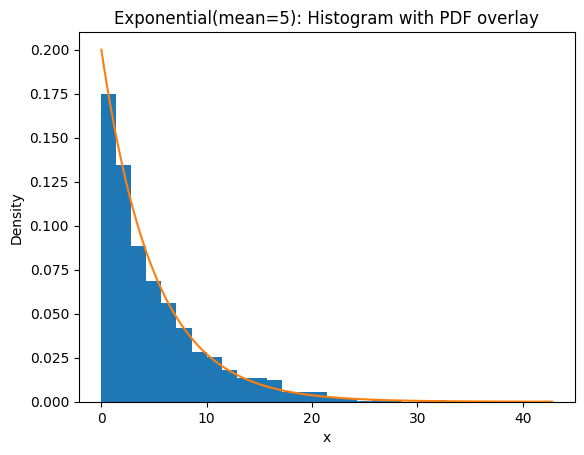

In [10]:
#Exponential(mean=5) histogram + PDF overlay

np.random.seed(0)   # optional for reproducibility of this plot
scale = 5.0
exp_samples = np.random.exponential(scale=scale, size=2000)

# create PDF overlay
x_pdf = np.linspace(0, np.max(exp_samples), 300)
y_pdf = (1/scale) * np.exp(-x_pdf/scale)

plt.figure()
plt.hist(exp_samples, bins=30, density=True)  # density=True to compare with PDF
plt.plot(x_pdf, y_pdf)                         # overlay theoretical PDF
plt.title("Exponential(mean=5): Histogram with PDF overlay")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


Central Limit Theorem

6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.


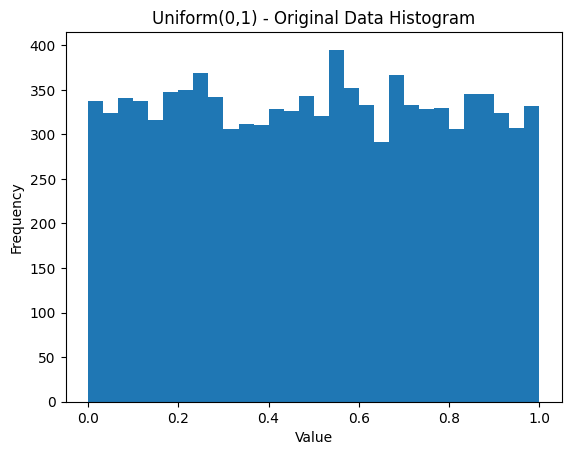

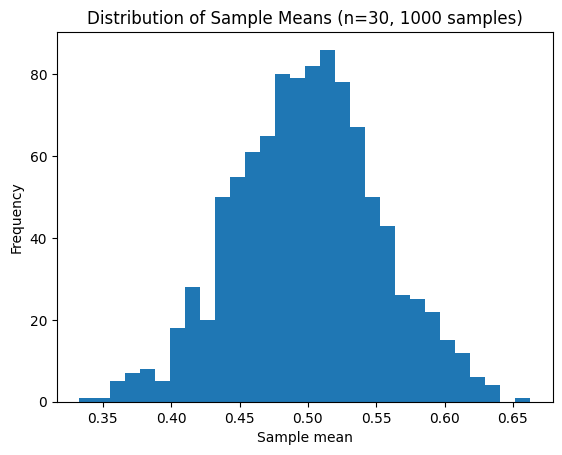

Empirical mean of sample means = 0.499528
Empirical std of sample means  = 0.053119
Theoretical mean = 0.500000
Theoretical std of sample means = 0.052705


In [11]:
#CLT demonstration

np.random.seed(1)           # optional for reproducible plots
uniform_data = np.random.uniform(low=0.0, high=1.0, size=10000)

# sample means
n_samples = 1000
n_per_sample = 30
means = [np.mean(np.random.uniform(0.0, 1.0, n_per_sample)) for _ in range(n_samples)]
means = np.array(means)

# plot original uniform histogram
plt.figure()
plt.hist(uniform_data, bins=30)
plt.title("Uniform(0,1) - Original Data Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# plot distribution of sample means
plt.figure()
plt.hist(means, bins=30)
plt.title(f"Distribution of Sample Means (n={n_per_sample}, {n_samples} samples)")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()

# comparisons
emp_mean_of_means = np.mean(means)
emp_std_of_means = np.std(means, ddof=0)
theoretical_mean = 0.5
theoretical_std_of_means = math.sqrt((1/12) / n_per_sample)


print(f"Empirical mean of sample means = {emp_mean_of_means:.6f}")
print(f"Empirical std of sample means  = {emp_std_of_means:.6f}")
print(f"Theoretical mean = {theoretical_mean:.6f}")
print(f"Theoretical std of sample means = {theoretical_std_of_means:.6f}")